In [ ]:
##Climate analysis with SQLAlchemy ORM queries, Pandas, and Matplotlib
#The aim of the analysis is to design queries using SQLAlchemy that will pull data about climate and weather for
#the ease of vacation planning in Hawaii (which could be applied to other locations as well.)
#Plots and tables are used to summarize the data, and a flask API is created to direct those to the API data
#output from the built in query code. 

In [1]:
#Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
#View the classes from automap
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Session link
session = Session(engine)

In [10]:
# Display one observation for each column for measurement data
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x154a848de48>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
# Display one observation for each column for station data
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x154a84d4908>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [12]:
#Build a query on the last 12 months of data
#write a query that shows the latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [35]:
#Query for last 12 months of data (12 months from latest date queried in last step)
precipitation=session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
precipitation

[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [36]:
#Load query results from precipitation into Pandas dataframe
#Set date as index 

prcp_df = pd.DataFrame(precipitation, columns=['Precipitation', 'date'])
prcp_df.set_index('date', inplace=True, )
prcp_df.sort_index()
prcp_df.head(10)

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


Text(0.5,1,'Precipitation by Date in Hawaii')

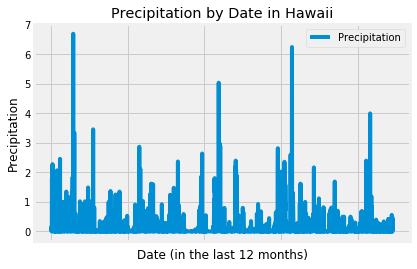

In [53]:
#Matplotlib to plot the data
prcp_df = pd.DataFrame(precipitation, columns=['Precipitation', 'date'])
prcp_df.set_index('date', inplace=True, )
prcp_df.sort_index()
prcp_df.plot(x_compat=True, stacked='false')
plt.xlabel('Date (in the last 12 months)')
plt.ylabel('Precipitation')
plt.title('Precipitation by Date in Hawaii')
#plt.tight_layout()
#plt.show()

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
# Query to show how many stations are available in the Station dataset
resultss=session.query(Station.station).count()
resultss

9

In [40]:
#Using measurement dataset get counts for each station. There is a total of 9. 
#Order by descending (by number of rows)

resultsm=session.query(Measurement.station, Measurement.tobs,
                       (func.count(Measurement.station))).group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
resultsm

[('USC00519281', 79.0, 2772),
 ('USC00519397', 81.0, 2724),
 ('USC00513117', 77.0, 2709),
 ('USC00519523', 82.0, 2669),
 ('USC00516128', 76.0, 2612),
 ('USC00514830', 82.0, 2202),
 ('USC00511918', 64.0, 1979),
 ('USC00517948', 81.0, 1372),
 ('USC00518838', 70.0, 511)]

In [20]:
# Station USC00519281 has the highest number of observations

In [22]:
#Display data for each station
resultsstat=session.query(Station.id, Station.name,
                          Station.station, 
                          Station.elevation, 
                          Station.longitude, 
                          Station.latitude).\
        order_by(Station.id).all()
resultsstat

[(1, 'WAIKIKI 717.2, HI US', 'USC00519397', 3.0, -157.8168, 21.2716),
 (2, 'KANEOHE 838.1, HI US', 'USC00513117', 14.6, -157.8015, 21.4234),
 (3,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  7.0,
  -157.8374,
  21.5213),
 (4, 'PEARL CITY, HI US', 'USC00517948', 11.9, -157.9751, 21.3934),
 (5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 306.6, -158.0111, 21.4992),
 (6,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  'USC00519523',
  19.5,
  -157.71139,
  21.33556),
 (7,
  'WAIHEE 837.5, HI US',
  'USC00519281',
  32.9,
  -157.84888999999998,
  21.45167),
 (8,
  'HONOLULU OBSERVATORY 702.2, HI US',
  'USC00511918',
  0.9,
  -157.9992,
  21.3152),
 (9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 152.4, -157.8025, 21.3331)]

In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperature=session.query(Measurement.station,
                         (func.min(Measurement.tobs)), 
                         (func.max(Measurement.tobs)),
                         (func.avg(Measurement.tobs))).\
                    order_by(Measurement.id).all()
temperature


[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [42]:
# The station with the highest number of temperature observations.
#temperaturecount=session.query(Measurement.station,
                       #(func.count(Measurement.tobs))).group_by(Measurement.tobs).\
                        #order_by(func.count(Measurement.tobs).desc()).all()
#temperaturecount

#Use the station the highest number of observations in general

[('USC00516128', 1752),
 ('USC00516128', 1654),
 ('USC00516128', 1625),
 ('USC00516128', 1606),
 ('USC00516128', 1601),
 ('USC00516128', 1425),
 ('USC00516128', 1375),
 ('USC00516128', 1257),
 ('USC00516128', 1159),
 ('USC00516128', 1103),
 ('USC00516128', 785),
 ('USC00516128', 739),
 ('USC00516128', 614),
 ('USC00516128', 603),
 ('USC00516128', 440),
 ('USC00516128', 381),
 ('USC00516128', 355),
 ('USC00516128', 240),
 ('USC00516128', 186),
 ('USC00516128', 169),
 ('USC00516128', 135),
 ('USC00516128', 81),
 ('USC00516128', 77),
 ('USC00516128', 49),
 ('USC00516128', 36),
 ('USC00516128', 31),
 ('USC00516128', 20),
 ('USC00511918', 18),
 ('USC00511918', 12),
 ('USC00511918', 11),
 ('USC00511918', 4),
 ('USC00511918', 4),
 ('USC00511918', 1),
 ('USC00519281', 1),
 ('USC00511918', 1)]

In [43]:
#Obtain last 12 months of temperature data for this station

resultstemp=session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
resultstemp[0:5]

[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27')]

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column

temp_df = pd.DataFrame(resultstemp, columns=['Station', 'Temperature', 'Date'])
temp_df.set_index('Date', inplace=True, )
temp_df.sort_index()
temp_df.head(10)

,Station,Temperature
Date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
2016-08-28,USC00519281,73.0
2016-08-29,USC00519281,78.0
2016-08-30,USC00519281,77.0
2016-08-31,USC00519281,78.0


Text(0.5,1,'Freqyuency of temperatures in Hawaii')

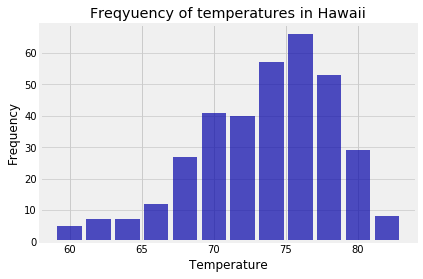

In [52]:
hist = temp_df.hist(bins=12, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Freqyuency of temperatures in Hawaii')

In [ ]:
#The code that will match the plot in the sample/starter

Text(0.5,1,'Freqyuency of temperatures in Hawaii')

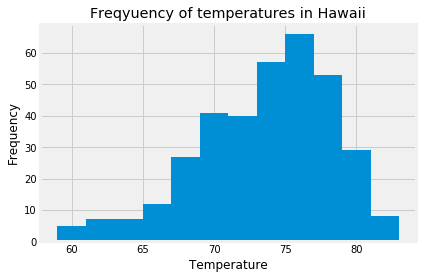

In [54]:
hist = temp_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Freqyuency of temperatures in Hawaii')

# Climate App 

In [ ]:
#Prepare code before visual studio for the climate app
#Double check that these are the results desired

In [69]:
#Convert the query results to a Dictionary using `date` as the key and `prcp` as the value.
#Return the JSON representation of your dictionary.
#/api/v1.0/precipitation
precipitation=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
precipitation


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [66]:
#Return a JSON list of stations from the dataset.
#/api/v1.0/stations
station1=session.query(Station.id, Station.name,
                          Station.station).\
        order_by(Station.id).all()
station1


[(1, 'WAIKIKI 717.2, HI US', 'USC00519397'),
 (2, 'KANEOHE 838.1, HI US', 'USC00513117'),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 (4, 'PEARL CITY, HI US', 'USC00517948'),
 (5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 (7, 'WAIHEE 837.5, HI US', 'USC00519281'),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 (9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')]

In [67]:
#query for the dates and temperature observations from a year from the last data point.
#Return a JSON list of Temperature Observations (tobs) for the previous year
#/api/v1.0/tobs`

#Including station as well- more informative
#Repeat of previous query but want a more relatable name in the json flask code

Temperature1=session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
Temperature1


[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27')]

In [63]:
#Pick a vacation time and query 15 days. Query dates greater than and equal to the start date of 09/15/2016
#/api/v1.0/<start>`

temperature2=session.query((func.min(Measurement.tobs)), 
                         (func.max(Measurement.tobs)),
                         (func.avg(Measurement.tobs))).\
filter(Measurement.date >= '2016-09-15').all()
temperature2
    print(f"item: {item.item}")

[(58.0, 87.0, 74.36786570743405)]

In [64]:
#Now query between the start date and end date including those dates 09/15/2016-09/30/2016
#/api/v1.0/<start>/<end>`

temperature3=session.query((func.min(Measurement.tobs)), 
                         (func.max(Measurement.tobs)),
                         (func.avg(Measurement.tobs))).\
filter(Measurement.date >= '2016-09-15', Measurement.date <= '2016-09-30').all()
temperature3

[(70.0, 83.0, 77.90384615384616)]